In [33]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
G=nx.DiGraph()

In [35]:
elist=[('a','h',8),('b','a',3),('c','a',5), ('c','d',5),('c','e',1),('d','c',6),('d','f',7),('d','g',1),
       ('e','b',6),('e','c',2),('g','a',7), ('g','b',4), ('g','e',8), ('g','h',3),('h','b',3),('h','f',9)]
G.add_weighted_edges_from(elist)

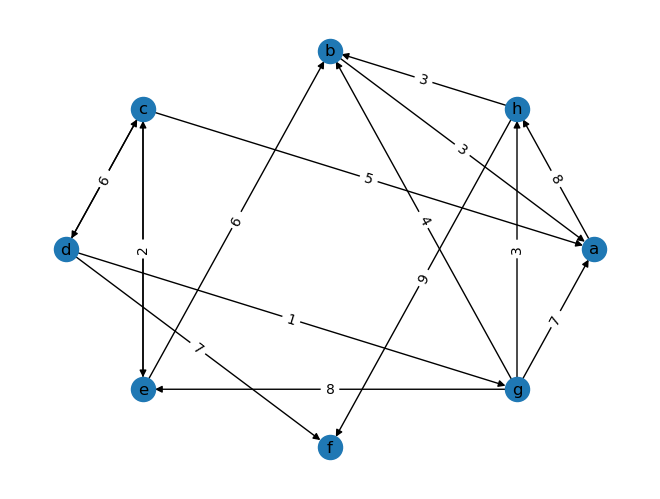

In [36]:
labels = nx.get_edge_attributes(G,'weight')
#pos=nx.get_node_attributes(G,'pos')
nx.draw(G, pos=nx.circular_layout(G), with_labels=True)
a=nx.draw_networkx_edge_labels(G, pos=nx.circular_layout(G), edge_labels=labels)

In [37]:
U=G.to_undirected()

In [38]:
nx.diameter(U)

3

In [39]:
nx.radius(U)

2

Центр графа

In [40]:
from networkx.algorithms.distance_measures import center

In [41]:
center(U)

['a', 'h', 'b', 'c', 'd', 'g']

Периферийные вершины:

In [42]:
nx.periphery(U)

['e', 'f']

In [43]:
nx.to_dict_of_lists(G)

{'a': ['h'],
 'h': ['b', 'f'],
 'b': ['a'],
 'c': ['a', 'd', 'e'],
 'd': ['c', 'f', 'g'],
 'e': ['b', 'c'],
 'f': [],
 'g': ['a', 'b', 'e', 'h']}

In [44]:
nx.to_edgelist(G)

OutEdgeDataView([('a', 'h', {'weight': 8}), ('h', 'b', {'weight': 3}), ('h', 'f', {'weight': 9}), ('b', 'a', {'weight': 3}), ('c', 'a', {'weight': 5}), ('c', 'd', {'weight': 5}), ('c', 'e', {'weight': 1}), ('d', 'c', {'weight': 6}), ('d', 'f', {'weight': 7}), ('d', 'g', {'weight': 1}), ('e', 'b', {'weight': 6}), ('e', 'c', {'weight': 2}), ('g', 'a', {'weight': 7}), ('g', 'b', {'weight': 4}), ('g', 'e', {'weight': 8}), ('g', 'h', {'weight': 3})])

In [45]:
nx.to_pandas_adjacency(G, dtype='int') #.to_csv('adjacency.csv')

,a,h,b,c,d,e,f,g
a,0,8,0,0,0,0,0,0
h,0,0,3,0,0,0,9,0
b,3,0,0,0,0,0,0,0
c,5,0,0,0,5,1,0,0
d,0,0,0,6,0,0,7,1
e,0,0,6,2,0,0,0,0
f,0,0,0,0,0,0,0,0
g,7,3,4,0,0,8,0,0


In [46]:
nx.to_pandas_edgelist(G) #.to_csv('edges.csv')

,source,target,weight
0,a,h,8
1,h,b,3
2,h,f,9
3,b,a,3
4,c,a,5
5,c,d,5
6,c,e,1
7,d,c,6
8,d,f,7
9,d,g,1


In [47]:
pd.DataFrame(nx.incidence_matrix(G, oriented=True).toarray(), dtype='int') #.to_csv('inci_matrix.csv')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
1,1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,-1,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,-1,-1,-1,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,-1,-1,-1,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,-1,-1,0,0,1,0
6,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,-1,-1,-1,-1


In [48]:
G.degree()

DiDegreeView({'a': 4, 'h': 4, 'b': 4, 'c': 5, 'd': 4, 'e': 4, 'f': 2, 'g': 5})

In [49]:
degrees = [[node,val] for (node, val) in G.degree()]
pd.DataFrame(sorted(degrees, key=lambda x:x[0])) #.to_csv('nodes.csv', header=False, index=False)

,0,1
0,a,4
1,b,4
2,c,5
3,d,4
4,e,4
5,f,2
6,g,5
7,h,4


Задача 2 из 1.5

In [50]:
list(nx.articulation_points(U))

[]

In [51]:
list(nx.bridges(U))

[]

<h2>1.3.</h2>

In [52]:
Q=nx.Graph()

In [53]:
Q.add_nodes_from(range(0,12))
Q.add_edges_from([(0,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,11),(11,2)])

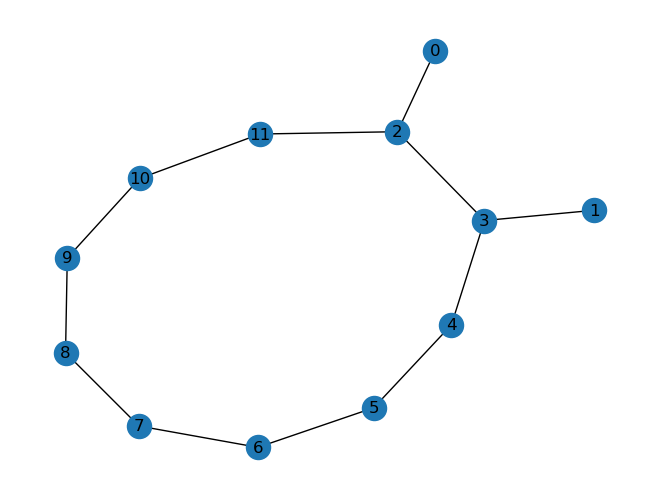

In [54]:
nx.draw(Q, pos=nx.spring_layout(Q), with_labels=True)
#a=nx.draw_networkx_edge_labels(Q, pos=nx.circular_layout(Q), edge_labels=labels)

<h2>1.4</h2>

In [55]:
Gs=[]
G=nx.Graph()
G.add_nodes_from([1,2])
G.add_edge(1,2)
Gs.append(G.copy())
G.add_node(3)
G.add_edge(2,3)
Gs.append(G.copy())
G.add_node(4)
G.add_edge(2,4)
Gs.append(G.copy())
G.remove_edge(2,4)
G.add_edge(3,4)
Gs.append(G.copy())
G.add_node(5)
G.add_edge(3,5)
Gs.append(G.copy())
G.remove_edge(1,2)
G.add_edge(1,3)
Gs.append(G.copy())
G.remove_edges_from([(3,4),(3,5)])
G.add_edges_from([(2,4),(4,5)])
Gs.append(G.copy())
G.add_node(6)
G.add_edge(5,6)
Gs.append(G.copy())
G.remove_edge(5,6)
G.add_edge(4,6)
Gs.append(G.copy())
G.remove_edge(1,3)
G.add_edge(1,2)
Gs.append(G.copy())
G.remove_edges_from([(6,4),(4,5)])
G.add_edges_from([(2,5),(2,6)])
Gs.append(G.copy())

<Figure size 500x200 with 0 Axes>

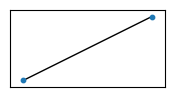

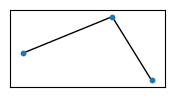

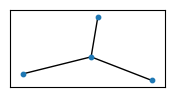

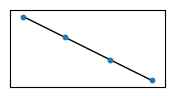

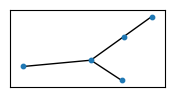

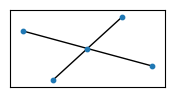

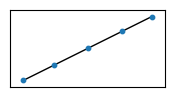

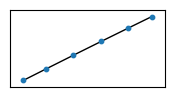

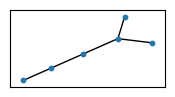

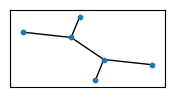

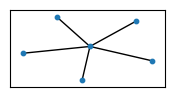

In [56]:
f=plt.figure(figsize=(5,2))
#gs = f.add_gridspec(5, 1)
for i in range(len(Gs)):
    plt.figure(figsize=(2,1))
    #ax=f.add_subfigure(gs[i,0], frameon=True)
    nx.draw_networkx(Gs[i], pos=nx.spring_layout(Gs[i]),  with_labels=False, node_size=10)

<h2>1.5</h2>

In [58]:
8*9*10/24

30.0

### Исхожу из того, что граф неориентированный, не псевдо граф и не мультиграф (по услолвию).
Рассмотрим матрицу смежности графа с 5 вершинами.
Общее число способов, которыми можно соединить вершины - это число клеток ниже главной диагонали: 10.
Число способов провести 6 ребер - сочетание из 10 по 6 = 30.
Число способов образовать 1 треугольник - сочетание из 5 по 3 = 10. Случаи с несколькими треугольниками сюда входят.
Вероятность = 10/30 = 1/3

<h2>1.6</h2>

3*5! = 360 (все вершины считаем различными).